In [64]:
import pandas as pd
import seaborn as sb
import random as rnd


Постройте скрытую марковскую модель  для поиска сайта  рестрикции ACGT. Переходные 
вероятности из сайта и из фона в конец последовательности равны: a(Bg → E) = a(site → E)= 
0.01. Переходная вероятность из фона в сайт равна  a(Bg → site)=0.01. Эмиссионные 
вероятности фона все равны 0.25. 
Нарисуйте автомат для модели (0.05 балла)
Восстановите недостающие вероятности (0.05 балла).
Напишите программу на Python, реализующие алгоритм Витерби для этой модели. (4 
баллов) Проверьте:
Программа находит правильные сайты.
Замените вероятности перехода из фона в сайта значения a(Bg → site)=0.001 и 
проверьте, как в этом случае находятся сайты
Напишите программу для алгоритма Forward-Backward. Посмотрите как она работает 
на разных вероятностях перехода a(Bg → site)  и постройте графики для вероятностей 
сайта и фона (4 балла).
Напишите программу генерации последовательности для этой модели (2 балла)

При программировании на Python (можно на R):
Не используйте дополнительные библиотеки (nympy – можно), Поскольку для 
проверки мне надо будет их устанавливать, но при этом могут возникнуть конфликты 
как с установленной версией Python, так и с уже установленными пакетами. 
Разбираться с этим я не буду.
Код – комментируйте, особенно – что значат те или иные переменные. Комментарии –  
только по-английски, в крайнем случае – транслитом, иначе у меня могут 
возникнуть проблемы с кодировкой. Есть стиль программирования – сначала пишутся 
комментарии,  а только потом между строк комментариев – сам код

Для алгоритма Витерби и алгоритма FB можно вместо программирования на Python 
использовать Exel или OpenOffice. 

Последовательность для тестирования: 

gataggattatcattcataagtttcagagcaatgtccttattctggaacttggatttatggctctt
ttggtttaatttcgcctgattcttgatctcctttagcttctcgacgtgggcctttttcttgccata
tggatccgctgcacggtcctgttccctagcatgtacgtgagcgtatttccttttaaaccacgacgc
tttgtcttcattcaacgtttcccattgtttttttctactattgctttgctgtgggaaaaacttatc
gaaagatgacgactttttcttaattctcgttttaagagcttggtgagcgctaggagtcactgccag

In [99]:
class Markov:
    def __init__(self, states,emissions,p_of_transition):
        self.states = states
        self.emissions = emissions
        self.p_of_transition = p_of_transition
    

    
    def Viterbi(self, string):
        Pr = []
        Prev_state = []
        Pr.append({})
        Prev_state.append({})
        for state in self.states:
            Pr[0][state] = self.p_of_transition["Begin"][state] * self.emissions[state][string[0]]
            Prev_state[0][state] = "Begin"
        for i in range(1,len(string)):
            Pr.append({})
            Prev_state.append({})
            for state in self.states:
                max = 0
                max_state = "Bg"
                for pr_state in self.states:
                    kur = Pr[i-1][pr_state] * self.p_of_transition[pr_state][state] * self.emissions[state][string[i]]
                    if kur > max:
                        max = kur
                        max_state = pr_state
                Pr[i][state] = max
                Prev_state[i][state] = max_state
        Pr.append({})
        Prev_state.append({})
        for pr_state in self.states:
            kur = Pr[i][pr_state] * self.p_of_transition[pr_state]["End"]
            if kur > max:
                max = kur
                max_state = pr_state
        Pr[i+1]["End"] = max
        Prev_state[i+1]["End"] = max_state

         

        kur_state = "End"
        i += 1
        ansv = ""
        while Prev_state[i][kur_state] != "Begin":
            if Prev_state[i][kur_state] == "Bg":
                ansv = string[i-1].lower() + ansv
            else:
                ansv = string[i-1] + ansv
            kur_state = Prev_state[i][kur_state]
            i -= 1
            
        
        return ansv, max
    

    def Forward_Backward(self, string, pos):
        alpha = [{"Begin": 1}]
        i = 0
        for i in range(pos):
            alpha.append({})
            for state in self.states:
                s = 0
                for pr_state in alpha[i].keys():
                    s += alpha[i][pr_state] * self.p_of_transition[pr_state][state] * self.emissions[state][string[i]]
                alpha[i+1][state] = s
        s = 0
        for pr_state in alpha[i].keys():
            s += alpha[i][pr_state] * self.p_of_transition[pr_state]["Bg"] * self.emissions["Bg"][string[pos]]
        ansv = s
        i = 0
        betta = [{"End":1}]
        for i in range(len(string) - pos ):
            betta.append({})
            for state in self.states:
                s = 0
                for nxt_state in betta[i].keys():
                    s += betta[i][nxt_state] * self.p_of_transition[state][nxt_state] * self.emissions[state][string[len(string) - i - 1]]
                betta[i+1][state] = s
        s=0
        for nxt_state in betta[i].keys():
            s += betta[i][nxt_state] * self.p_of_transition["Bg"][nxt_state] 
        ansv *= s

        for i in range(len(string)):
            alpha.append({})
            for state in self.states:
                s = 0
                for pr_state in alpha[i].keys():
                    s += alpha[i][pr_state] * self.p_of_transition[pr_state][state] * self.emissions[state][string[i]]
                alpha[i+1][state] = s
        s = 0
        for pr_state in alpha[i].keys():
            s += alpha[i][pr_state] * self.p_of_transition[pr_state]["End"]

        return ansv / s
    

    def random_line(self):
        kur_state = "Begin"
        line = ""
        while kur_state != "End":
            ch = rnd.random()
            for state, value in self.p_of_transition[kur_state].items():
                ch = ch - value
                if (ch < 0):
                    kur_state = state
                    break
            ch = rnd.random()
            for char, value in self.emissions[kur_state].items():
                ch = ch - value
                if ch < 0:
                    line = line + char
                    break
        return line
                
        
        






    

In [3]:
states_s = [ "Bg", "A", "C", "G", "T", "End"]
p_of_transition_s = {
    "Begin":{   "Bg":0.99,  "A":0.01,   "C":0,  "G":0,  "T":0,  "End":0     },
    "Bg":{      "Bg":0.98,  "A":0.01,   "C":0,  "G":0,  "T":0,  "End":0.01  },
    "A":{       "Bg":0,     "A":0,      "C":1,  "G":0,  "T":0,  "End":0     },
    "C":{       "Bg":0,     "A":0,      "C":0,  "G":1,  "T":0,  "End":0     },
    "G":{       "Bg":0,     "A":0,      "C":0,  "G":0,  "T":1,  "End":0     },
    "T":{       "Bg":0.98,  "A":0.01,   "C":0,  "G":0,  "T":0,  "End":0.01  },
    "End":{     "Bg":0,     "A":0,      "C":0,  "G":0,  "T":0,  "End":0     }
    }
emissions_s = {
    "Bg":   {   "A":0.25,  "C":0.25,   "G":0.25,   "T":0.25    }, 
    "A":    {   "A":1,     "C":0,      "G":0,      "T":0       },    
    "C":    {   "A":0,     "C":1,      "G":0,      "T":0       }, 
    "G":    {   "A":0,     "C":0,      "G":1,      "T":0       }, 
    "T":    {   "A":0,     "C":0,      "G":0,      "T":1       },
    "End":  {   "A":0,     "C":0,      "G":0,      "T":0       }
}


In [4]:
def make_p( i ):
    return {
        "Begin":{   "Bg":1-i,  "A":i,   "C":0,  "G":0,  "T":0,  "End":0     },
        "Bg":{      "Bg":0.99 - i,  "A":i,   "C":0,  "G":0,  "T":0,  "End":0.01  },
        "A":{       "Bg":0,     "A":0,      "C":1,  "G":0,  "T":0,  "End":0     },
        "C":{       "Bg":0,     "A":0,      "C":0,  "G":1,  "T":0,  "End":0     },
        "G":{       "Bg":0,     "A":0,      "C":0,  "G":0,  "T":1,  "End":0     },
        "T":{       "Bg":0.99-i,  "A":i,   "C":0,  "G":0,  "T":0,  "End":0.01  },
        "End":{     "Bg":0,     "A":0,      "C":0,  "G":0,  "T":0,  "End":0     }
        }

In [5]:
f = open("C:\\tmp\\t.txt","r")
string = f.read().strip().upper()
print(string)

GATAGGATTATCATTCATAAGTTTCAGAGCAATGTCCTTATTCTGGAACTTGGATTTATGGCTCTTTTGGTTTAATTTCGCCTGATTCTTGATCTCCTTTAGCTTCTCGACGTGGGCCTTTTTCTTGCCATATGGATCCGCTGCACGGTCCTGTTCCCTAGCATGTACGTGAGCGTATTTCCTTTTAAACCACGACGCTTTGTCTTCATTCAACGTTTCCCATTGTTTTTTTCTACTATTGCTTTGCTGTGGGAAAAACTTATCGAAAGATGACGACTTTTTCTTAATTCTCGTTTTAAGAGCTTGGTGAGCGCTAGGAGTCACTGCCAG


In [100]:
M1 = Markov(states_s,emissions_s,p_of_transition_s)


In [7]:
a = {"pos":[],"pr":[]}
for i in range(1, len(string)):
    a["pos"].append(i)
    a["pr"].append(M1.Forward_Backward(string,i))


In [21]:
M2 = Markov(states_s,emissions_s, make_p(0.0001))
a = {"pos":[],"pr":[]}
for i in range(1, len(string)):
    a["pos"].append(i)
    a["pr"].append(M2.Forward_Backward(string,i))

In [25]:
p_to_check = {0.01,0.009,0.008,0.007,0.006,0.005,0.004,0.003,0.002,0.001,0.0005,0.0001}

In [41]:
a = {"pos":[],"pr":[],"a":[]}
for k in p_to_check:
    M  = Markov(states_s,emissions_s, make_p(k))
    for i in range(1, len(string)):
        a["pos"].append(i)
        a["pr"].append(M.Forward_Backward(string,i))
        a["a"].append(k)

In [51]:
dt = pd.DataFrame(a)
dt_1 = dt.pivot("pos","a","pr")
dt_1.head()

a,0.0001,0.0005,0.0010,0.0020,0.0030,0.0040,0.0050,0.0060,0.0070,0.0080,0.0090,0.0100
pos,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


<AxesSubplot:xlabel='pos'>

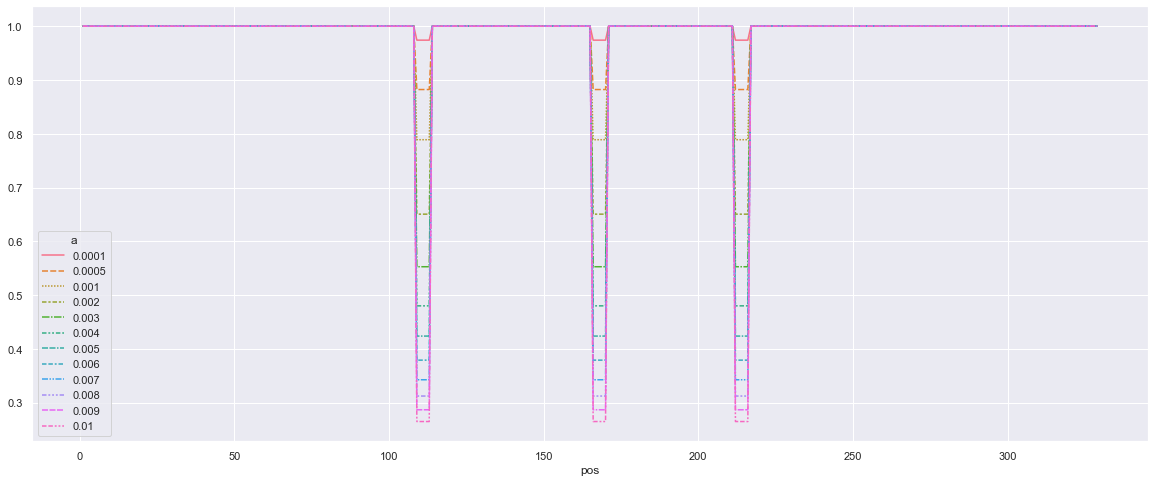

In [55]:
sb.set(rc = {'figure.figsize':(20,8)})
sb.lineplot(data = dt_1)

In [116]:
line = M1.random_line()
M1.Viterbi(line)

('tgctcttgtgattcaggtaccACGTcaaattgagccctctattgagtgctactgctgatatcgcgatagcaatggcgacatggagtacgcgcgagagtttagaaaatataacgaattatACGTttccACGTactttctagaggctcgatgatttgatattggtcacgaatgtcgcctgggccggtgcaggccgacttttgcgcacacagtaatccataaacgcggcgttgatcgagttccgttggcgttgtataagaaggaggtccagaccaacttctcaccagcattcaatccatagagtttctctggcataccacttgaagcacatatt',
 1.4073108344907857e-203)